<a href="https://colab.research.google.com/github/marconebhering/data-science/blob/main/An%C3%A1lise_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução**

Atualmente, as grandes organizações perdem cerca de 5% de sua receita anual para fraudes. Portanto, há um enorme interesse em detectar e prevenir atividades fraudulentas.

Com o avanço da tecnologia, hoje as grandes empresas optam por combater fraude utilizando dados. Mais especificamente, aplicando algoritmos de aprendizado supervisionado para detectar comportamentos fraudulentos semelhantes aos anteriores, bem como métodos de aprendizado não supervisionado para descobrir novos padrões de atividades fraudulentas.

# Caso

Uma nova empresa de cartão de crédito acaba de entrar no mercado no oeste dos Estados Unidos. A empresa está se promovendo como um dos cartões de crédito mais seguros para usar. 

Fomos contratados como cientista de dados responsável por identificar casos de fraude. O executivo que nos contratou, forneceu dados sobre transações com cartão de crédito, incluindo se cada transação era fraudulenta ou não.

O executivo quer saber com que precisão podemos prever fraudes usando esses dados. Ele enfatizou que o **modelo deve ser cauteloso: não é um grande problema sinalizar transações como fraudulentas quando não são apenas para serem seguras.** 

#**Dataset**

O conjunto de dados analisado, consiste em transações de cartão de crédito no oeste dos Estados Unidos. 

Inclui informações sobre cada transação, incluindo detalhes do cliente, o comerciante e a categoria da compra e se a transação foi ou não uma fraude.

## Dicionário de Variáveis

| Variável | Descrição |
| ---- | ---- |
| transdatetrans_time | Data e Hora da Transação                    |
| merchant            | Nome do Comerciante                         |
| category            | Categoria do Comerciante                    |
| amt                 | Valor da Transação                          |
| city                | Cidade do Titular do Cartão de Crédito      |
| state               | Estado do Titular do Cartão de Crédito      |
| lat                 | Latitude do Local de Compra                 |
| long                | Longitude do Local de Compra                |
| city_pop            | População da Cidade do Titular do Cartão    |
| job                 | Cargo do Titular do Cartão de Crédito       |
| dob                 | Data de Nascimento do Titular do Cartão     |
| trans_num           | Número da Transação                         |
| merch_lat           | Latitude do Local do Comerciante            |
| merch_long          | Longitude do Local do Comerciante           |
| is_fraud            | Se a Transação é Fraude (1) ou Não (0) |


##Importação das Bibliotecas

In [ ]:
%%capture
!pip install imbalanced-learn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
import plotly.express as px
from geopy import distance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler

##Leitura do Dataset

In [ ]:
df = pd.read_csv('credit_card_fraud.csv', parse_dates = ['trans_date_trans_time', 'dob'])
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0


##Tamanho da Base

In [ ]:
print('O Dataset possui', df.shape[1], 'variáveis e', df.shape[0], 'registros.')

O Dataset possui 15 variáveis e 339607 registros.


# **Análise Exploratória**

Antes de fazer qualquer suposição, é necessário prosseguir com uma análise exploratória, para buscar compreender melhor os dados, detectando alguns padrões, desvios e relações entre as variáveis.

##Valores Ausentes

A verificação de valores ausentes é fundamental, uma vez que algoritmos de aprendizado de máquina não são capazes de lidar com conjuntos de dados com dados faltantes.

Além disso, valores ausentes podem revelar algum padrão decorrente de anomalias na obtenção dos dados.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  339607 non-null  datetime64[ns]
 1   merchant               339607 non-null  object        
 2   category               339607 non-null  object        
 3   amt                    339607 non-null  float64       
 4   city                   339607 non-null  object        
 5   state                  339607 non-null  object        
 6   lat                    339607 non-null  float64       
 7   long                   339607 non-null  float64       
 8   city_pop               339607 non-null  int64         
 9   job                    339607 non-null  object        
 10  dob                    339607 non-null  datetime64[ns]
 11  trans_num              339607 non-null  object        
 12  merch_lat              339607 non-null  floa

No dataset não há valores faltantes em nenhuma das colunas.

## Distribuição da variável alvo

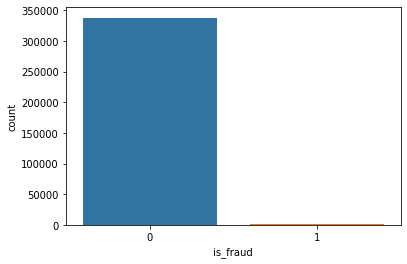

In [ ]:
sns.countplot(data = df, x = 'is_fraud');

De acordo com o gráfico acima, fica claro que estamos lidando com um problema de dados desbalanceados, ou seja, a variável alvo tem poucos casos registrados como fraude em relação ao total de observações.

## Quais tipos de compra são mais propensas a fraudes?

###Categoria

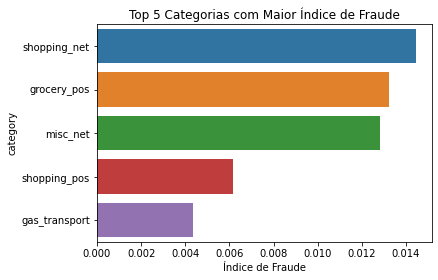

In [ ]:
c = df.groupby(['category'])['is_fraud'].mean()
c.sort_values(ascending = False, inplace = True)
c = sns.barplot(y = c.index[0:5], x = c.iloc[0:5])
c.set_xlabel('Índice de Fraude')
c.set_title('Top 5 Categorias com Maior Índice de Fraude');

Compras feitas nas categorias `shopping_net`, `grocery_pos` e `misc_net` são mais propensas a fraudes.

###Valor da Transação

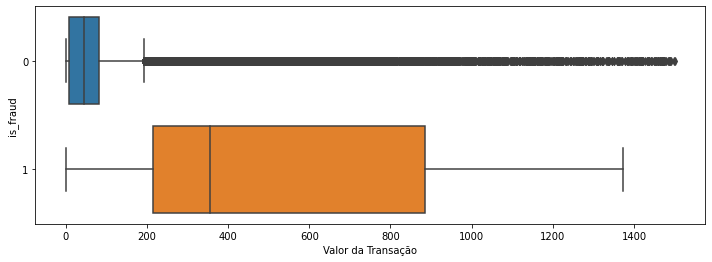

In [ ]:
plt.figure(figsize = (12,4))
a = sns.boxplot(data = df[df['amt']<1500], y = 'is_fraud', x = 'amt', orient = 'h')
a.set_xlabel('Valor da Transação');

Transações de valores mais altos são mais propensas a fraudes.

###Estado

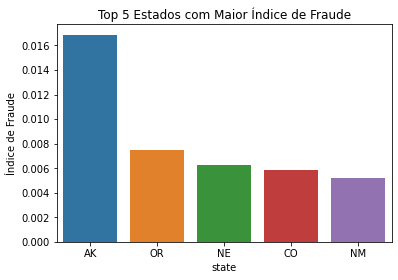

In [ ]:
e = df.groupby(['state'])['is_fraud'].mean()
e.sort_values(ascending = False, inplace = True)
e = sns.barplot(x = e.index[0:5], y = e.iloc[0:5])
e.set_ylabel('Índice de Fraude')
e.set_title('Top 5 Estados com Maior Índice de Fraude');

Compras feitas no estado do Alaska (AK), particularmente, são mais propensas a fraudes.

# **Pré-Processamento**

O pré-processamento é um conjunto de atividades que envolvem preparação, organização e estruturação dos dados. Trata-se de uma etapa fundamental que precede a realização de análises e predições.

Essa etapa é de grande importância, pois será determinante para a qualidade final dos dados que serão analisados. Ela pode, inclusive, impactar no modelo de previsão, gerado a partir dos dados.

## *Feature Engineering*

A engenharia de recursos, ou *feature engineering* é o processo de selecionar, manipular e transformar dados brutos em recursos que podem ser usados ​​no aprendizado supervisionado.

É uma técnica que aproveita os dados para criar novas variáveis ​​que não estão no conjunto de treinamento, com o objetivo de simplificar e acelerar as transformações de dados e, ao mesmo tempo, aprimorar a precisão do modelo

### Transformar Data de Nascimento em Idade

In [ ]:
def age(date_of_birth):
    today = date.today()
    return (
        date.today().year
        - date_of_birth.year
        - ((today.month, today.day) < (date_of_birth.month, date_of_birth.day))
    )

df['age'] = df['dob'].apply(age)

### Distância do Comerciante

In [ ]:
calculate_distance = lambda x: distance.geodesic(
    (x['lat'], x['long']), (x['merch_lat'], x['merch_long'])
    ).km

df['distance_from_merchant'] = df.apply(calculate_distance, axis=1)

### Data e Hora da Transação

In [ ]:
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.day
df['month'] = df['trans_date_trans_time'].dt.month

### Histórico do Comerciante, Categoria e Estado

In [ ]:
df['merch_fraud_prop'] = df.groupby('merchant')['is_fraud'].transform('mean')
df['category_fraud_prop'] = df.groupby('category')['is_fraud'].transform('mean')
df['state_fraud_prop'] = df.groupby('state')['is_fraud'].transform('mean')

NameError: ignored

## Selecão de Features e Target

In [ ]:
X = df[['amt', 'city_pop', 'age', 'distance_from_merchant', 'hour', 'day', 
            'month', 'merch_fraud_prop', 'category_fraud_prop', 'state_fraud_prop']]

y = df['is_fraud']

# **Modelo**

Realizadas as etapas de Análise Exploratória e Pré Processamento, prosseguimos para a elaboração do modelo.

## Métrica de Avaliação 
Se tratando de um problema de classificação de fraudes, a principal métrica de avaliação do modelo será o **Recall**. Uma vez que um algoritmo mais conservador é mais sensato, ou seja, classificar uma transação normal como fraude, é menos pior do que classificar uma transação fraudulenta como normal.

## Baseline

Como modelo base, foi utilizado um Classificador Dummy, que faz predições aleatórias com base na estratificação da variável alvo.

In [ ]:
dummy = DummyClassifier(strategy = 'stratified', random_state = 0)
dummy.fit(X, y)
dummy_pred = dummy.predict(X)
dummy_recall = recall_score(y, dummy_pred)
dummy_acc = dummy.score(X, y)
dummy_pre = precision_score(y, dummy_pred)

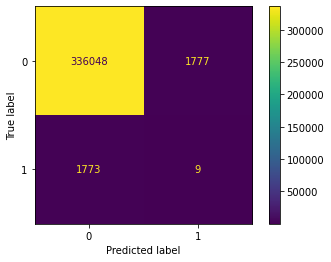

In [ ]:
ConfusionMatrixDisplay.from_predictions(y, dummy_pred)
plt.show()

In [ ]:
print('Recall do Classificador Dummy:', '{:.2f}%'.format(dummy_recall*100))
print('Acurácia do Classificador Dummy:', '{:.2f}%'.format(dummy_acc*100))

Recall do Classificador Dummy: 0.51%
Acurácia do Classificador Dummy: 98.95%
Precisão do Classificador Dummy: 0.50%


## Conjuntos de Treino e Teste

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)

## Random Forest Classifier

In [ ]:
rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train, y_train)
rf_clf_pred = rf_clf.predict(X_test)
rf_clf_recall = recall_score(y_test, rf_clf_pred)
rf_clf_acc = accuracy_score(y_test, rf_clf_pred)

In [ ]:
print('Recall da Random Forest:', '{:.2f}%'.format(rf_clf_recall*100))
print('Acurácia da Random Forest:', '{:.2f}%'.format(rf_clf_acc*100))

Recall da Random Forest: 69.16%
Acurácia da Random Forest: 99.83%


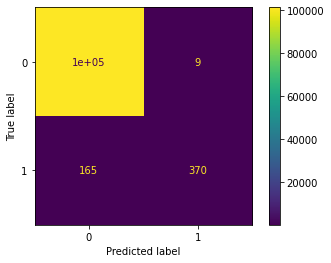

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, rf_clf_pred)
plt.show()

## *Features Importance*

Uma das vantagens dos algoritmos baseados em árvores, é que podemos obter a importância dos atributos para a previsão do modelo, o que auxilia e muito a interpretação.

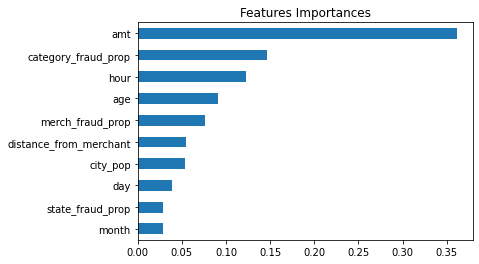

In [ ]:
importances = pd.Series(
    data = rf_clf.feature_importances_, index = X_train.columns
).sort_values()

importances.plot(kind="barh")
plt.title("Features Importances")
plt.show()

# **Reamostragem**

A reamostragem tem o objetivo em alterar a composição dos dados de treinamento para um modelo de classificação desbalanceado.

Essa tendência no conjunto de dados de treinamento pode influenciar muitos algoritmos de aprendizado de máquina, levando alguns a ignorar completamente a classe minoritária, sendo um problema, pois normalmente é a classe minoritária em que as previsões são mais importantes.

Existem várias técnicas como *random over-sampling*, *random under-sampling* e *SMOTE*, neste estudo não vamos entrar em detalhes a respeito das particularidades de cada técnica.

## Random Over-sampling

Nesse caso vamos trabalhar com a técnica de *random over-sampling*, mas em um contexto profissional, o recomendado seria testar outras técnicas e avaliar qual retorna o melhor resultado.

In [ ]:
ros = RandomOverSampler(random_state = 0)
X_res, y_res = ros.fit_resample(X_train, y_train)

In [ ]:
rf_clf_rs = RandomForestClassifier(random_state = 0)
rf_clf_rs.fit(X_res, y_res)
rf_clf_rs_pred = rf_clf_rs.predict(X_test)

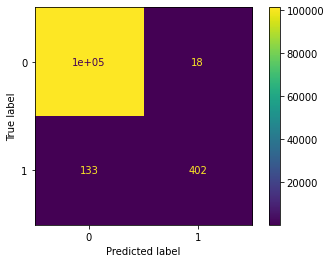

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, rf_clf_rs_pred)
plt.show()

In [ ]:
rf_clf_rs_recall = recall_score(y_test, rf_clf_rs_pred)
rf_clf_rs_acc = accuracy_score(y_test, rf_clf_rs_pred)
print('Recall da Random Forest:', '{:.2f}%'.format(rf_clf_rs_recall*100))
print('Acurácia da Random Forest:', '{:.2f}%'.format(rf_clf_rs_acc*100))

Recall da Random Forest: 75.14%
Acurácia da Random Forest: 99.85%


# **Resultados**

Como podemos ver, a reamostragem apresentou uma melhora de 6 pontos percentuais no *Recall*, chegando a *75.14%*.

Neste ponto, o ideal seria executar um Grid Search para realizar uma otimização de hiperparametros, porém, devido ao conjunto de dados ser relativamente grande, isso gera um volume de processamento alto e pode levar horas, portanto fica para uma próxima oportunidade.